# Experimentation and uplift testing


In [76]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [77]:
df=pd.read_csv("QVI_data.csv");
df.head(2)

,LYLTY_CARD_NBR,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream


In [78]:
df['DATE'] = pd.to_datetime(data['DATE'])

In [79]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   DATE              264834 non-null  datetime64[ns]
 2   STORE_NBR         264834 non-null  int64         
 3   TXN_ID            264834 non-null  int64         
 4   PROD_NBR          264834 non-null  int64         
 5   PROD_NAME         264834 non-null  object        
 6   PROD_QTY          264834 non-null  int64         
 7   TOT_SALES         264834 non-null  float64       
 8   PACK_SIZE         264834 non-null  int64         
 9   BRAND             264834 non-null  object        
 10  LIFESTAGE         264834 non-null  object        
 11  PREMIUM_CUSTOMER  264834 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 24.2+ MB


Inserted a column 'year_month' in the dataframe.

In [80]:
df.insert(1,'YEAR_MONTH',df['DATE'].dt.to_period('M'))
df.head()

,LYLTY_CARD_NBR,YEAR_MONTH,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,2018-10,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium
1,1002,2018-09,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream
2,1003,2019-03,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget
3,1003,2019-03,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget
4,1004,2018-11,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream


We have changed dtypes for simplicity and easier operations.

In [81]:
cols_with_changed_dtypes = {'PROD_NAME':'category','PROD_QTY':'category','LIFESTAGE':'category','PREMIUM_CUSTOMER':'category',
                            'BRAND':'category'}
df = df.astype(cols_with_changed_dtypes)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264834 entries, 0 to 264833
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   LYLTY_CARD_NBR    264834 non-null  int64         
 1   YEAR_MONTH        264834 non-null  period[M]     
 2   DATE              264834 non-null  datetime64[ns]
 3   STORE_NBR         264834 non-null  int64         
 4   TXN_ID            264834 non-null  int64         
 5   PROD_NBR          264834 non-null  int64         
 6   PROD_NAME         264834 non-null  category      
 7   PROD_QTY          264834 non-null  category      
 8   TOT_SALES         264834 non-null  float64       
 9   PACK_SIZE         264834 non-null  int64         
 10  BRAND             264834 non-null  category      
 11  LIFESTAGE         264834 non-null  category      
 12  PREMIUM_CUSTOMER  264834 non-null  category      
dtypes: category(5), datetime64[ns](1), float64(1), int64(5), pe

We'll remove the stores which does not contain transaction data of all 12 months.

In [82]:
check = df.groupby('STORE_NBR')['YEAR_MONTH'].nunique()
check = check[check!=12]
print('Stores with less than 12 month of transaction data')
display(check)
stores_with_less_than_12_months = check.index.to_list()
del check

Stores with less than 12 month of transaction data


STORE_NBR
11      2
31      2
44     11
76      1
85      1
92      1
117    11
193     3
206     2
211     2
218    11
252     2
Name: YEAR_MONTH, dtype: int64

In [83]:
indices_to_drop  = df[df['STORE_NBR'].isin(stores_with_less_than_12_months)].index
print(f'Shape before dropping: {df.shape}\n')
df=df.drop(indices_to_drop)
print(f'Shape after dropping: {df.shape}\n')
print(f'Number of samples that are dropped:{len(indices_to_drop)}')

Shape before dropping: (264834, 13)

Shape after dropping: (264645, 13)

Number of samples that are dropped:189


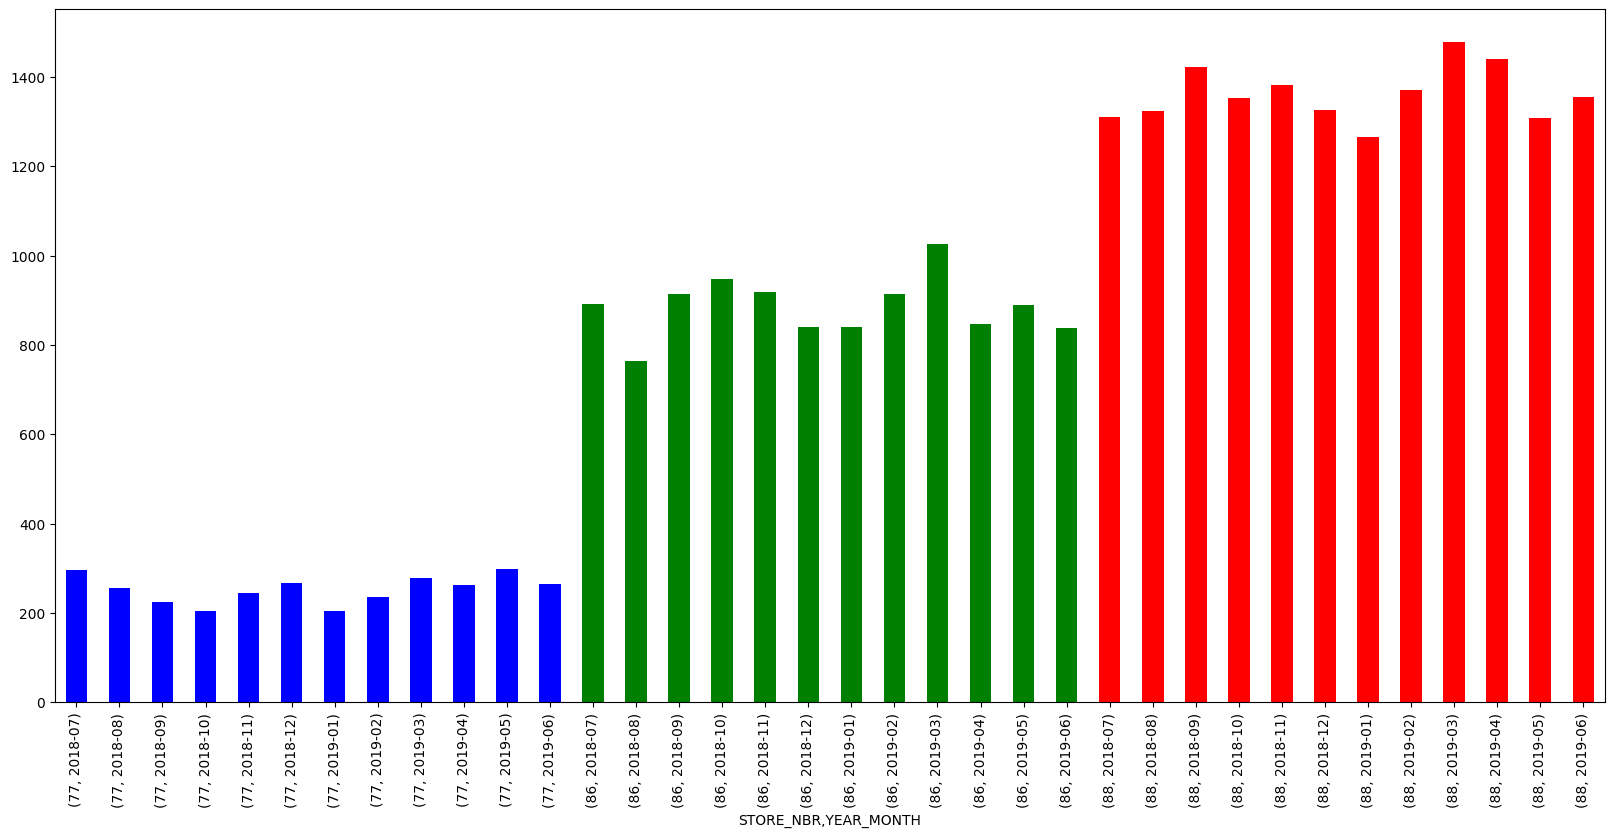

In [84]:
check = df[df['STORE_NBR'].isin([77,86,88])].groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].sum()
check.index
colors=[]
for store,month in check.index:
  if store==77:
    colors.append('b')
  elif store==86:
    colors.append('g')
  else:
    colors.append('r')

check.plot(kind='bar',color=colors,figsize=(20,9))
plt.show()

In [85]:
df['YEARLY_SALE'] = df.groupby('STORE_NBR')['TOT_SALES'].transform('sum')
df['YEARLY_CUSTS'] = df.groupby('STORE_NBR')['LYLTY_CARD_NBR'].transform('nunique')
df['MONTHLY_SALE'] = df.groupby(['STORE_NBR','YEAR_MONTH'])['TOT_SALES'].transform('sum')
df['MONTHLY_CUSTS'] = df.groupby(['STORE_NBR','YEAR_MONTH'])['LYLTY_CARD_NBR'].transform('nunique')

I need to add another column: average transaction per customer in the store.

In [86]:
avg_trans = df.groupby('STORE_NBR').apply(lambda subdf: (subdf['TXN_ID'].nunique()/subdf['YEARLY_CUSTS'].nunique()))
avg_trans = avg_trans.astype('float64')
df['avg_txn_per_cust'] = df['STORE_NBR'].map(avg_trans)
df['avg_txn_per_cust']

0          572.0
1          572.0
2          572.0
3          572.0
4          572.0
           ...  
264829    1857.0
264830    1857.0
264831    1857.0
264832    1857.0
264833    1857.0
Name: avg_txn_per_cust, Length: 264645, dtype: float64

In [87]:
df.head()

,LYLTY_CARD_NBR,YEAR_MONTH,DATE,STORE_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER,YEARLY_SALE,YEARLY_CUSTS,MONTHLY_SALE,MONTHLY_CUSTS,avg_txn_per_cust
0,1000,2018-10,2018-10-17,1,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175,NATURAL,YOUNG SINGLES/COUPLES,Premium,2393.6,345,188.1,44,572.0
1,1002,2018-09,2018-09-16,1,2,58,Red Rock Deli Chikn&Garlic Aioli 150g,1,2.7,150,RRD,YOUNG SINGLES/COUPLES,Mainstream,2393.6,345,278.8,59,572.0
2,1003,2019-03,2019-03-07,1,3,52,Grain Waves Sour Cream&Chives 210G,1,3.6,210,GRNWVES,YOUNG FAMILIES,Budget,2393.6,345,192.9,45,572.0
3,1003,2019-03,2019-03-08,1,4,106,Natural ChipCo Hony Soy Chckn175g,1,3.0,175,NATURAL,YOUNG FAMILIES,Budget,2393.6,345,192.9,45,572.0
4,1004,2018-11,2018-11-02,1,5,96,WW Original Stacked Chips 160g,1,1.9,160,WOOLWORTHS,OLDER SINGLES/COUPLES,Mainstream,2393.6,345,192.6,46,572.0


"pre_df" is the dataset which contains samples only before the trial period.

"trial_df" is the datset which contains samples of trial period.


In [88]:
pre_df = df[df['DATE'] < '2019-02-01']
trial_df = df[((df['DATE'] > "2019-01-31") & (df['DATE'] < "2019-05-01"))]

In [89]:
min_date_in_trial_df, max_date_in_trial_df = min(trial_df['DATE']), max(trial_df['DATE'])
min_date_in_pre_df, max_date_in_pre_df =  min(pre_df['DATE']), max(pre_df['DATE'])
print(f'the trial_df dataframe consists of samples between {min_date_in_trial_df}, {max_date_in_trial_df}')
print(f'the pre_df dataframe consists of samples between {min_date_in_pre_df}, {max_date_in_pre_df}')

the trial_df dataframe consists of samples between 2019-02-01 00:00:00, 2019-04-30 00:00:00
the pre_df dataframe consists of samples between 2018-07-01 00:00:00, 2019-01-31 00:00:00


<ipython-input-90-7b4098e6189a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmat = pre_df.corr()


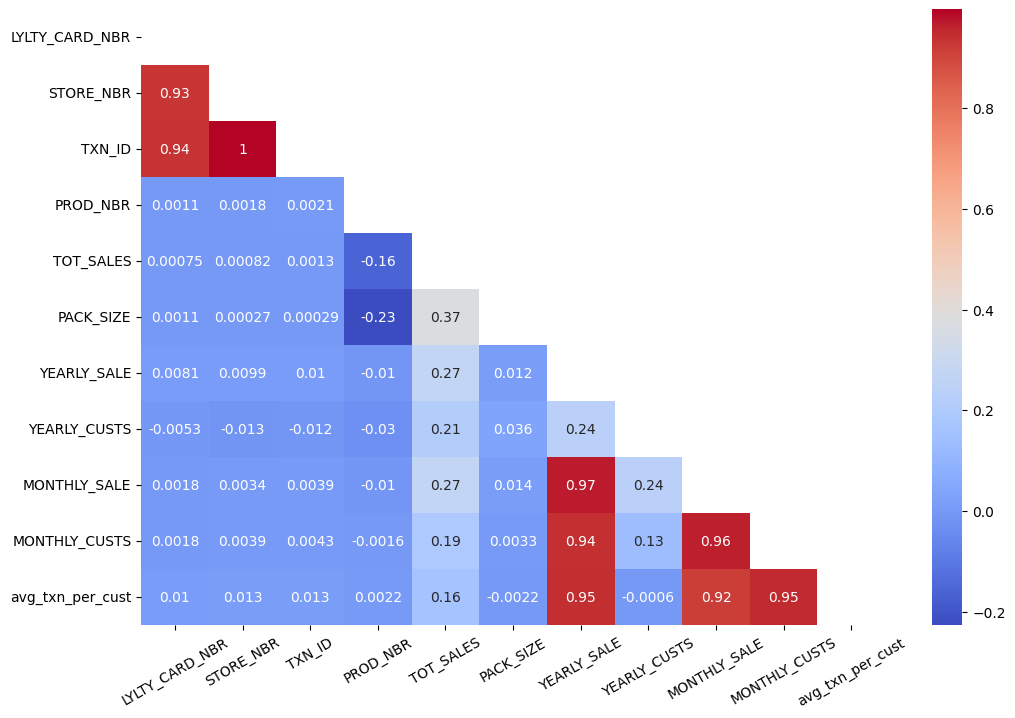

In [90]:
plt.figure(figsize=(12,8))
corrmat = pre_df.corr()
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat,mask=mask,cmap = 'coolwarm',annot=True)
plt.xticks(rotation = 30)
plt.show()

'metrics_cols' are the features for correlation and ranking between trial stores and control stores.

In [91]:
metrics_cols = ['STORE_NBR','YEAR_MONTH','YEARLY_SALE','YEARLY_CUSTS','MONTHLY_SALE','MONTHLY_CUSTS','avg_txn_per_cust']

In [92]:
def extract_matrices(df):
  subdf = df.loc[:,metrics_cols].set_index(['STORE_NBR','YEAR_MONTH']).sort_values(by=['STORE_NBR','YEAR_MONTH'])
  subdf.drop_duplicates(inplace=True,keep='first')
  return subdf

metrics_df = extract_matrices(pre_df)
metrics_df.head()

YEARLY_SALE  YEARLY_CUSTS  MONTHLY_SALE  MONTHLY_CUSTS  \
STORE_NBR YEAR_MONTH                                                           
1         2018-07          2393.6           345         206.9             49   
          2018-08          2393.6           345         176.1             42   
          2018-09          2393.6           345         278.8             59   
          2018-10          2393.6           345         188.1             44   
          2018-11          2393.6           345         192.6             46   

                      avg_txn_per_cust  
STORE_NBR YEAR_MONTH                    
1         2018-07                572.0  
          2018-08                572.0  
          2018-09                572.0  
          2018-10                572.0  
          2018-11                572.0

Function to find correlation between trial stores and control stores one by one.

In [93]:
def calc_corr(trial_store):
    '''
    input: It takes one trial store to compare other stores with.
    output: New dataframe with correlation and mean correlation.
    '''
    a=[]
    metrics = metrics_df[['MONTHLY_SALE', 'MONTHLY_CUSTS']]
    for i in metrics.index:
        a.append(metrics.loc[trial_store].corrwith(metrics.loc[i[0]]))
    subdf = pd.DataFrame(a)
    subdf.index = metrics.index
    subdf = subdf.drop_duplicates()
    subdf.index = [s[0] for s in subdf.index]
    subdf.index.name ="STORE_NBR"
    subdf = subdf.abs()
    subdf['mean_corr'] = subdf.mean(axis=1)
    subdf.sort_values(by = 'mean_corr', ascending = False, inplace = True)
    return subdf

# Correlation with trial store: 77

In [94]:
corr_77 = calc_corr(77).drop(77)
corr_77.head(5)

,MONTHLY_SALE,MONTHLY_CUSTS,mean_corr
STORE_NBR,,,
233,0.903774,0.990358,0.947066
119,0.867664,0.983267,0.925466
71,0.914106,0.754817,0.834461
3,0.806644,0.834207,0.820426
41,0.783232,0.844219,0.813726


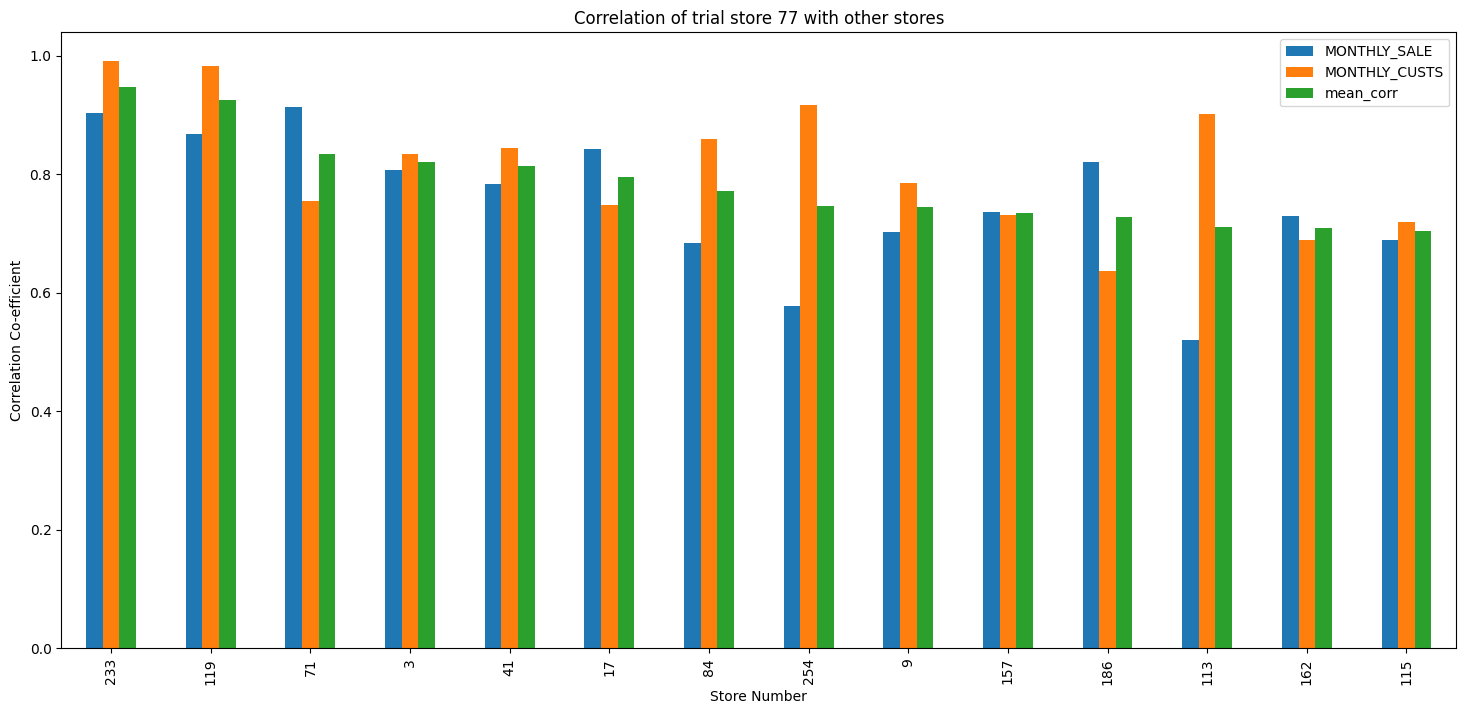

In [95]:
corr_77[corr_77['mean_corr'].abs()>0.7].plot(kind='bar',figsize=(18,8))
plt.title('Correlation of trial store 77 with other stores')
plt.xlabel('Store Number')
plt.ylabel('Correlation Co-efficient')
plt.show()

The store '233' with the highest score is selected as the control store for trial store '77'.

Now let's quantify how related it is to the trial store by using plots and some stats. Since monthly sales and customers are only parameters we can monitor. Therefore we'll just see these two parameters.

<ipython-input-97-8385f841baa1>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[77]['MONTHLY_SALE'],color='r',ax=ax)
<ipython-input-97-8385f841baa1>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[233]['MONTHLY_SALE'],color='g',ax=ax)


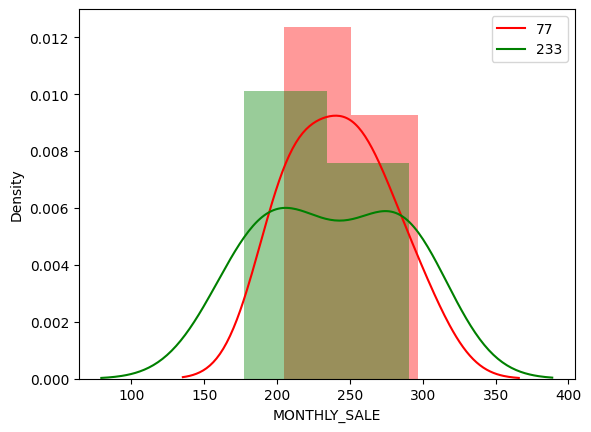

In [97]:
fig,ax = plt.subplots()

sns.distplot(metrics_df.loc[77]['MONTHLY_SALE'],color='r',ax=ax)
sns.distplot(metrics_df.loc[233]['MONTHLY_SALE'],color='g',ax=ax)
plt.legend(labels=['77','233'])
plt.show()

<ipython-input-98-f5d186e248b9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[77]['MONTHLY_CUSTS'],color='r',ax=ax)
<ipython-input-98-f5d186e248b9>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[233]['MONTHLY_CUSTS'],color='g',ax=ax)


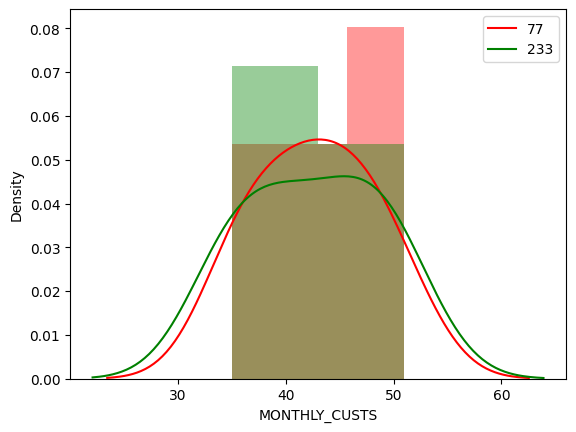

In [98]:
fig,ax = plt.subplots()

sns.distplot(metrics_df.loc[77]['MONTHLY_CUSTS'],color='r',ax=ax)
sns.distplot(metrics_df.loc[233]['MONTHLY_CUSTS'],color='g',ax=ax)
plt.legend(labels=['77','233'])
plt.show()

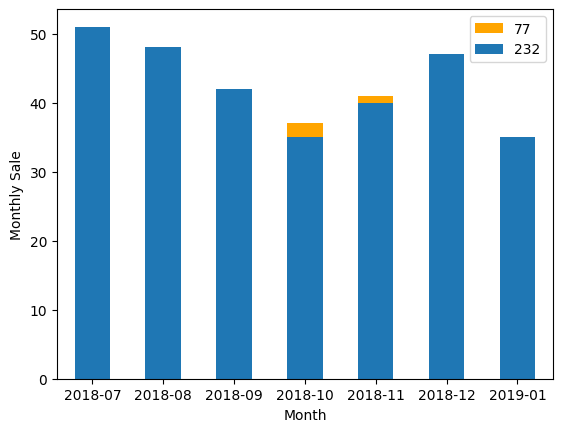

In [105]:
metrics_df.loc[77]['MONTHLY_CUSTS'].plot(kind='bar',color='Orange')
metrics_df.loc[233]['MONTHLY_CUSTS'].plot(kind='bar')
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Monthly Sale')
plt.legend(labels = (77, 232))
plt.show()

Even the trend in the number of customers every month follows a similar trend between the stores.


Let our null hypothesis be that both the trial store and our selected control store are similar. Now if we want to reject the null hypothesis then we must have pvalue close to zero.

Let null hypothesis be that both stores 77 and 233 have no difference

In [108]:
from scipy.stats import ks_2samp,ttest_ind,t

For pre trial period, since p-values for TOT_SALES, CUSTOMERS and PROD_QTY are high (say more than 0.95), we can't reject the null hypothesis.

In [106]:
metrics_df.head(2)

YEARLY_SALE  YEARLY_CUSTS  MONTHLY_SALE  MONTHLY_CUSTS  \
STORE_NBR YEAR_MONTH                                                           
1         2018-07          2393.6           345         206.9             49   
          2018-08          2393.6           345         176.1             42   

                      avg_txn_per_cust  
STORE_NBR YEAR_MONTH                    
1         2018-07                572.0  
          2018-08                572.0

In [109]:
cols_under_consideration  = ['MONTHLY_SALE','MONTHLY_CUSTS']
a=[]
for x in metrics_df[cols_under_consideration]:
  a.append(ks_2samp(metrics_df.loc[77][x],metrics_df.loc[233][x]))
a=pd.DataFrame(a,index=cols_under_consideration)
a.head()

<ipython-input-109-8ca0677757ca>:4: RuntimeWarning: ks_2samp: Exact calculation unsuccessful. Switching to method=asymp.
  a.append(ks_2samp(metrics_df.loc[77][x],metrics_df.loc[233][x]))


,statistic,pvalue
MONTHLY_SALE,0.285714,0.962704
MONTHLY_CUSTS,0.142857,0.999961


From the dataframe above we can say that both are similar (pvalues are high close to 1). Hence we cannot reject our null hypothesis.



# Assessment of Trial

Now we'll compare the trial store with the control store in the trial period i.e. from Febraury 2019 to April 2019.

In [112]:
trial_metrics_df = extract_matrices(trial_df)
trial_metrics_df.head()


YEARLY_SALE  YEARLY_CUSTS  MONTHLY_SALE  MONTHLY_CUSTS  \
STORE_NBR YEAR_MONTH                                                           
1         2019-02          2393.6           345         225.4             52   
          2019-03          2393.6           345         192.9             45   
          2019-04          2393.6           345         192.9             42   
2         2019-02          2005.8           313         139.4             29   
          2019-03          2005.8           313         192.1             43   

                      avg_txn_per_cust  
STORE_NBR YEAR_MONTH                    
1         2019-02                572.0  
          2019-03                572.0  
          2019-04                572.0  
2         2019-02                505.0  
          2019-03                505.0

In [113]:
b=[]
for x in trial_metrics_df[cols_under_consideration]:
  b.append(ks_2samp(trial_metrics_df.loc[77][x],trial_metrics_df.loc[233][x]))
b=pd.DataFrame(b,index=cols_under_consideration)
b.head()

,statistic,pvalue
MONTHLY_SALE,0.666667,0.6
MONTHLY_CUSTS,0.666667,0.6


Since both the pvalues are >5 we reject the null hypothesis. Since both the stores are similar in pre-trial but not in trial period hence we reject the null hypothesis.

Comparing each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [118]:
print('critical t-value for 95% confidence level:')
t.ppf(0.95, 6)

critical t-value for 95% confidence level:


1.9431802803927816

We can see that t-value is greater than 95 percentile for febraury to april.

Therefore we can say that there was increase in sale in trial store than the control store during the trial period.

Let's plot the means for both the stores in trial period.

<ipython-input-120-d4967d98ef34>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[77]['MONTHLY_SALE'])
<ipython-input-120-d4967d98ef34>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[233]['MONTHLY_SALE'])


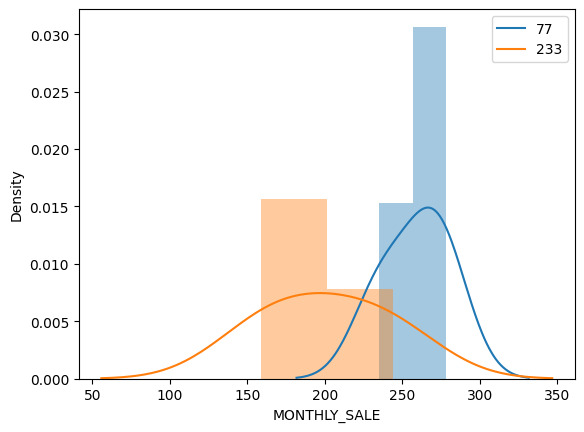

In [120]:
sns.distplot(trial_metrics_df.loc[77]['MONTHLY_SALE'])
sns.distplot(trial_metrics_df.loc[233]['MONTHLY_SALE'])
plt.legend(labels=['77','233'])

<ipython-input-122-678fef1832c6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[77]['MONTHLY_CUSTS'])
<ipython-input-122-678fef1832c6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[233]['MONTHLY_CUSTS'])


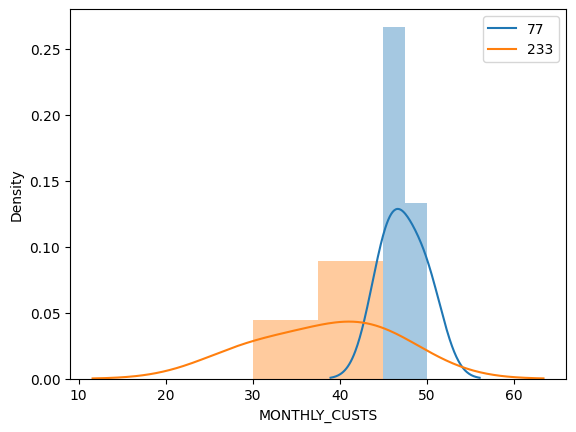

In [122]:
sns.distplot(trial_metrics_df.loc[77]['MONTHLY_CUSTS'])
sns.distplot(trial_metrics_df.loc[233]['MONTHLY_CUSTS'])
plt.legend(labels=['77','233'])

We can see that the distribution of monthly sale and monthly customers of both the stores in the trial period is much different than the distribution of monthly sale and monthly customers in pre-trial period.

The results show that the trial store 77 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

We can also see that there is significant increase in sales of chips in trial stores in the trial period.

# Correlation with trial store: 86

In [123]:
corr_86 = calc_corr(86).drop(86)
corr_86.head()

,MONTHLY_SALE,MONTHLY_CUSTS,mean_corr
STORE_NBR,,,
155,0.877882,0.942876,0.910379
23,0.784698,0.943559,0.864128
120,0.872693,0.815097,0.843895
114,0.734415,0.855339,0.794877
260,0.720350,0.846502,0.783426


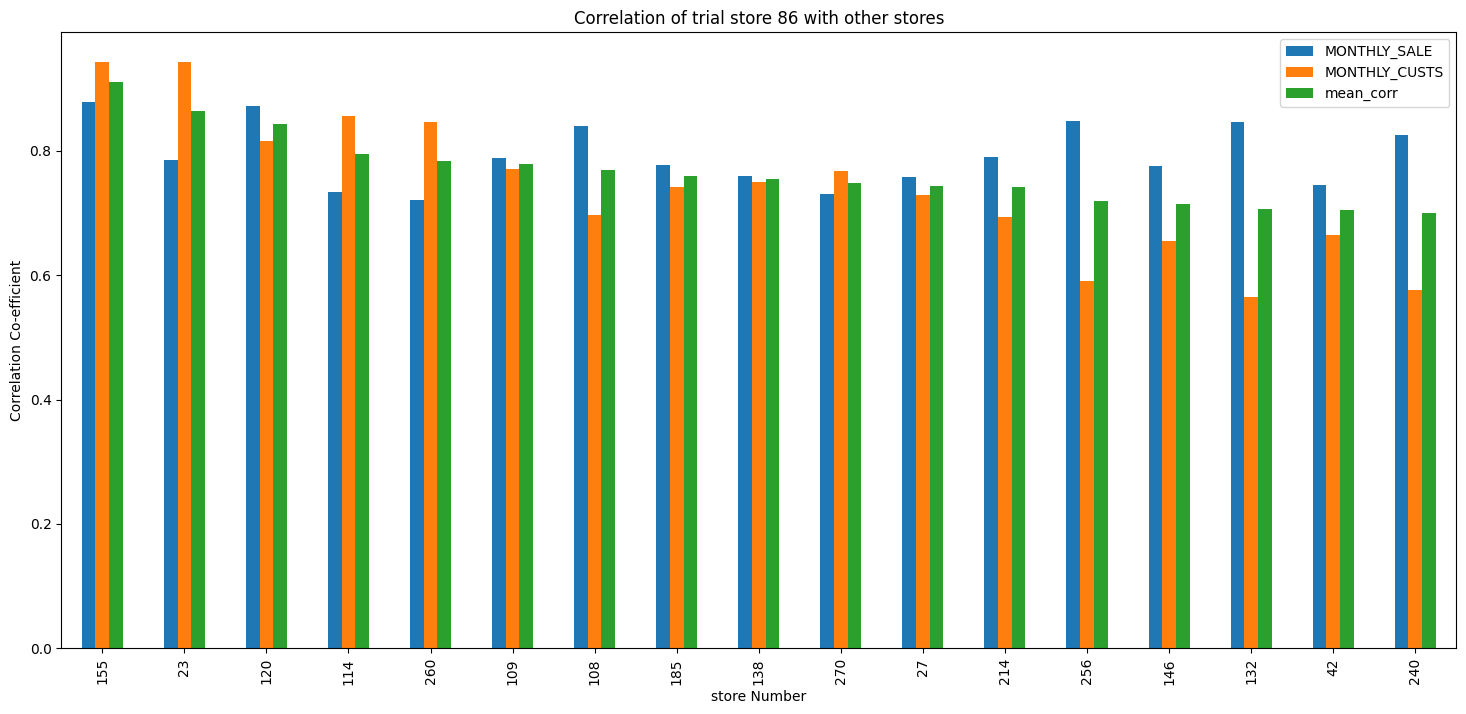

In [124]:
corr_86[corr_86['mean_corr'].abs()>0.7].plot(kind='bar',figsize=(18,8))
plt.title('Correlation of trial store 86 with other stores')
plt.xlabel('store Number')
plt.ylabel('Correlation Co-efficient')
plt.show()

The store '155' with the highest score is selected as the control store for trial store '86'.

Now let's quantify how related it is to the trial store by using plots and some stats. Since monthly sales and customers are only parameters we can monitor. Therefore we'll just see these two parameters.

<ipython-input-133-4a5e4765b309>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[86]['MONTHLY_SALE'])
<ipython-input-133-4a5e4765b309>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[155]['MONTHLY_SALE'])


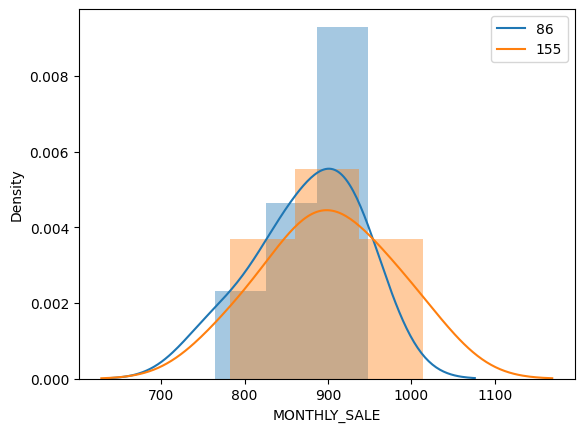

In [133]:
fig,ax = plt.subplots()
sns.distplot(metrics_df.loc[86]['MONTHLY_SALE'])
sns.distplot(metrics_df.loc[155]['MONTHLY_SALE'])
plt.legend(labels = ['86','155'])
plt.show()

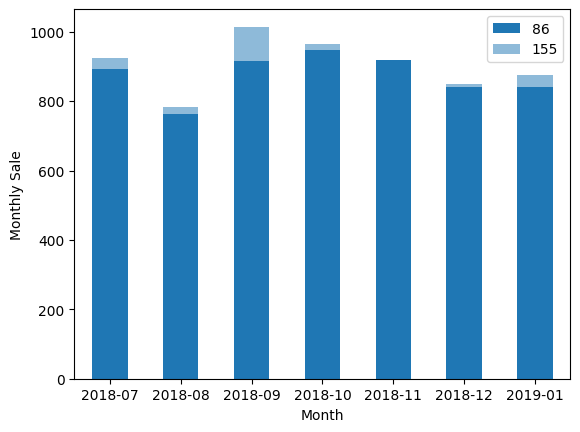

In [129]:
metrics_df.loc[86]['MONTHLY_SALE'].plot(kind = 'bar')
metrics_df.loc[155]['MONTHLY_SALE'].plot(kind = 'bar', alpha = 0.5)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Monthly Sale')
plt.legend(labels = (86, 155))
plt.show()

Even though the monthly sale values are diffrent but we see a similar trend in the sales through out the period.

<ipython-input-135-9981e5436d88>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[86]['MONTHLY_CUSTS'])
<ipython-input-135-9981e5436d88>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[155]['MONTHLY_CUSTS'])


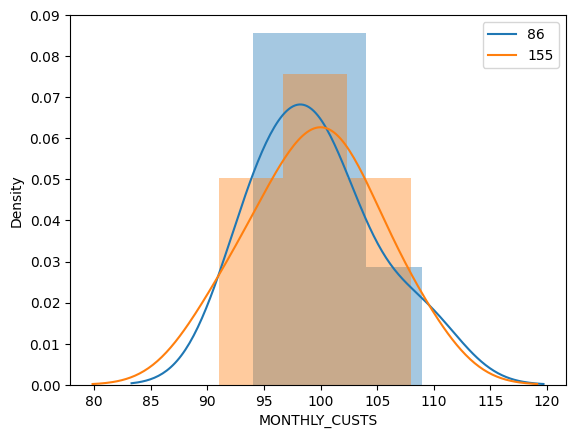

In [135]:
fig,ax = plt.subplots()
sns.distplot(metrics_df.loc[86]['MONTHLY_CUSTS'])
sns.distplot(metrics_df.loc[155]['MONTHLY_CUSTS'])
plt.legend(labels = ['86','155'])
plt.show()

We can see that monthly customers are similar in both the stores.

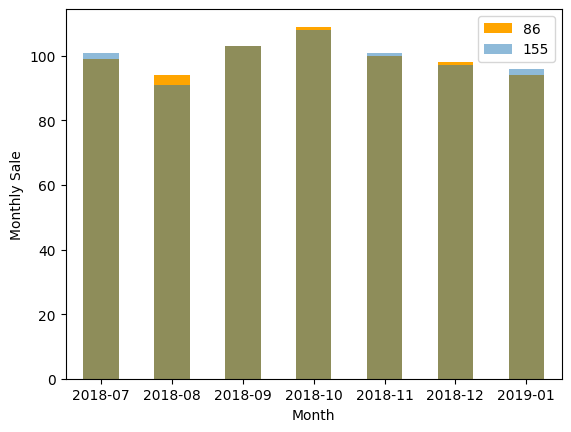

In [143]:
metrics_df.loc[86]['MONTHLY_CUSTS'].plot(kind = 'bar',color='orange')
metrics_df.loc[155]['MONTHLY_CUSTS'].plot(kind = 'bar', alpha = 0.5)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Monthly Sale')
plt.legend(labels = (86, 155))
plt.show()

Even the trend in the number of customers every month follows a similar trend between the stores.

Let our null hypothesis be that both the trial store and our selected control store are similar. Now if we want to reject the null hypothesis then we must have pvalue close to zero.

In [150]:
cols_under_consideration = ['MONTHLY_SALE','MONTHLY_CUSTS']
a=[]
for x in metrics_df[cols_under_consideration]:
  a.append(ks_2samp(metrics_df.loc[86][x],metrics_df.loc[155][x]))

a=pd.DataFrame(a,index=cols_under_consideration)
a.head()


,statistic,pvalue
MONTHLY_SALE,0.285714,0.962704
MONTHLY_CUSTS,0.285714,0.962704


From the dataframe above we can say that both are similar (pvalues are high close to 1). Hence we cannot reject our null hypothesis.

# Assessment of Trial

Now we'll compare the trial store with the control store in the trial period i.e. from Febraury 2019 to April 2019.

In [153]:
b=[]
for x in trial_metrics_df[cols_under_consideration]:
  b.append(ks_2samp(trial_metrics_df.loc[86][x],trial_metrics_df.loc[155][x]))

b=pd.DataFrame(a,index=cols_under_consideration)
b.head()

,statistic,pvalue
MONTHLY_SALE,0.285714,0.962704
MONTHLY_CUSTS,0.285714,0.962704


Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.

Comparing each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)



In [154]:
t.ppf(0.95,6)

1.9431802803927816

We can see that t-value is greater than 95 percentile for febraury to april.

The results show that the trial in store 86 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's plot the means for both the stores in trial period.

<ipython-input-155-b71efa916835>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[86]['MONTHLY_SALE'])
<ipython-input-155-b71efa916835>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[155]['MONTHLY_SALE'])


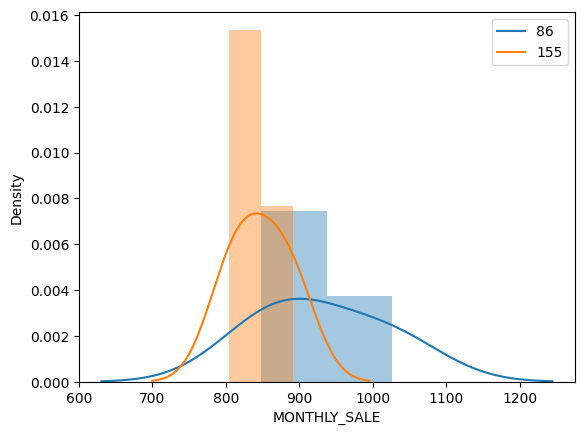

In [155]:
sns.distplot(trial_metrics_df.loc[86]['MONTHLY_SALE'])
sns.distplot(trial_metrics_df.loc[155]['MONTHLY_SALE'])
plt.legend(labels=['86','155'])

<ipython-input-156-a816075ab3b6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[86]['MONTHLY_CUSTS'])
<ipython-input-156-a816075ab3b6>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[155]['MONTHLY_CUSTS'])


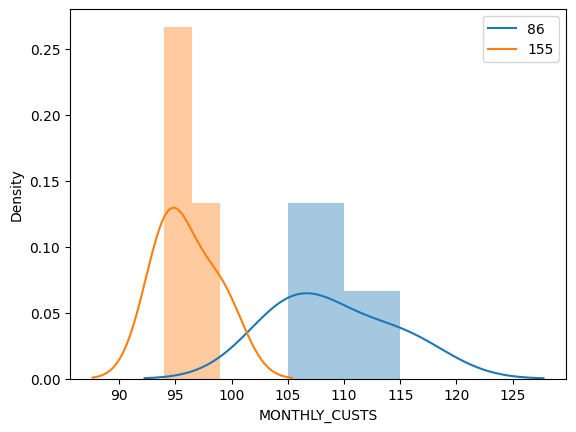

In [156]:
sns.distplot(trial_metrics_df.loc[86]['MONTHLY_CUSTS'])
sns.distplot(trial_metrics_df.loc[155]['MONTHLY_CUSTS'])
plt.legend(labels=['86','155'])

We can see that the distribution of monthly sale and monthly customers of both the stores in the trial period is much different than the distribution of monthly sale and monthly customers in pre-trial period.

The results show that the trial store 86 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

We can also see that there is significant increase in sales of chips in trial stores in the trial period.

# Correlation with trial store: 88

In [165]:
corr_88 = calc_corr(88).drop(88)
corr_88.head()

,MONTHLY_SALE,MONTHLY_CUSTS,mean_corr
STORE_NBR,,,
178,0.731857,0.939466,0.835661
14,0.698557,0.942976,0.820767
133,0.735407,0.835426,0.785417
204,0.885774,0.550263,0.718018
134,0.864293,0.508880,0.686587


In [170]:
corr_88['mean_corr'].head(20)

STORE_NBR
178    0.835661
14     0.820767
133    0.785417
204    0.718018
134    0.686587
113    0.679198
253    0.656400
239    0.651501
230    0.641117
187    0.635170
227    0.633695
69     0.632910
237    0.627903
141    0.618994
48     0.609324
235    0.593378
161    0.587455
90     0.583081
167    0.579229
159    0.560096
Name: mean_corr, dtype: float64

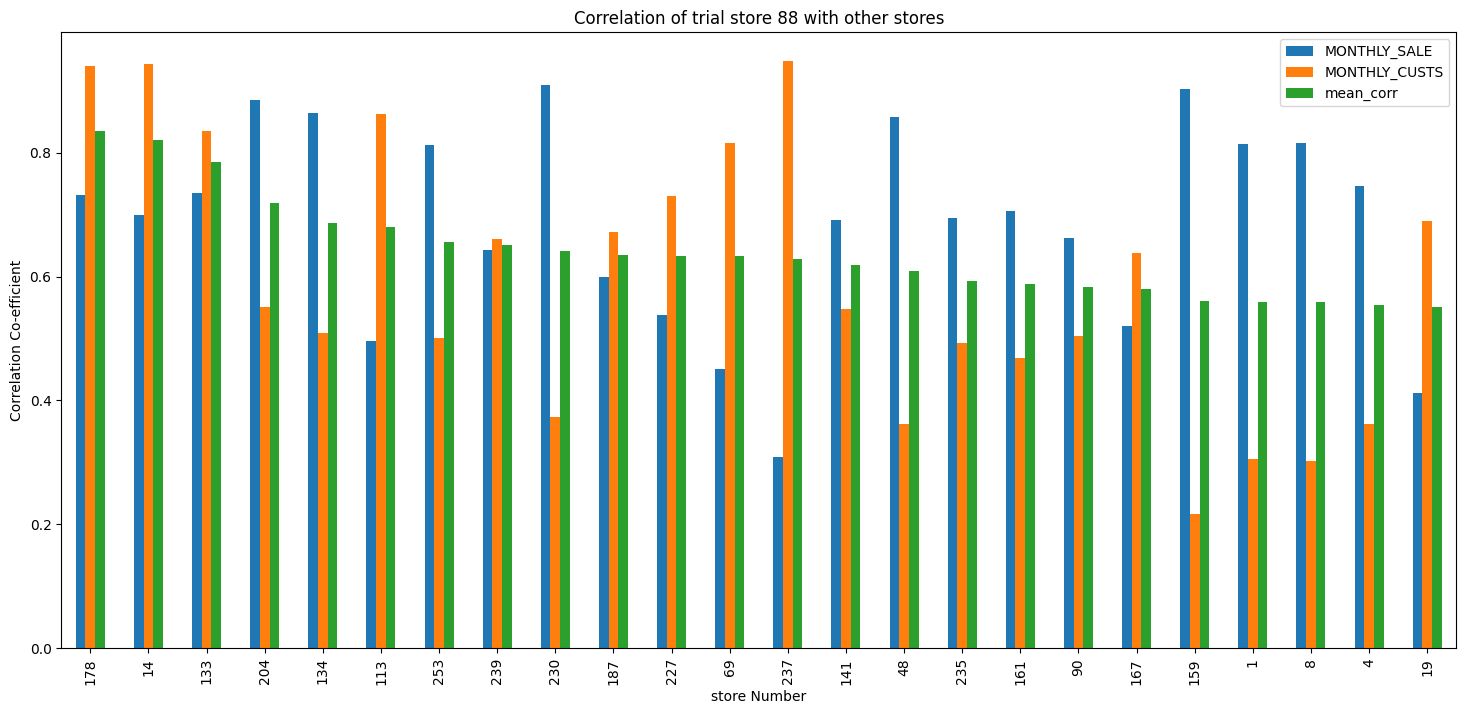

In [163]:
corr_88[corr_88['mean_corr'].abs() > 0.55].plot(kind = 'bar', figsize = (18, 8))
plt.title('Correlation of trial store 88 with other stores')
plt.xlabel('store Number')
plt.ylabel('Correlation Co-efficient')
plt.show()

The store '178' has the highest score but we'll consider store '237' as the control store since the monthly sales is much correlated with it. Therefore store '237' is selected as the control store for trial store '88'.

Now let's quantify how related it is to the trial store by using plots and some stats. Since monthly sales and customers are only parameters we can monitor. Therefore we'll just see these two parameters.

<ipython-input-190-63d358374845>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[88]['MONTHLY_SALE'],ax=ax)
<ipython-input-190-63d358374845>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[237]['MONTHLY_SALE'],ax=ax)


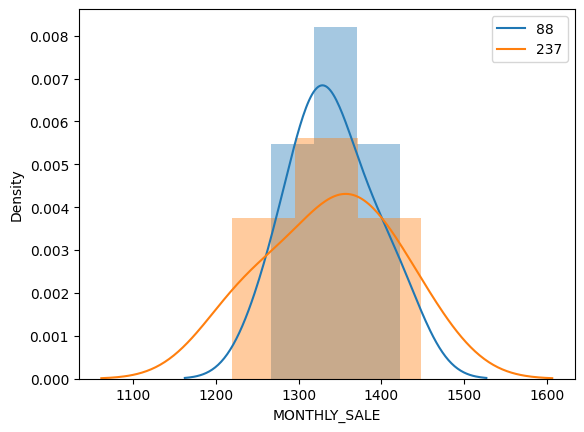

In [190]:
fig,ax = plt.subplots()
sns.distplot(metrics_df.loc[88]['MONTHLY_SALE'],ax=ax)
sns.distplot(metrics_df.loc[237]['MONTHLY_SALE'],ax=ax)
plt.legend(labels = ['88', '237'])
plt.show()


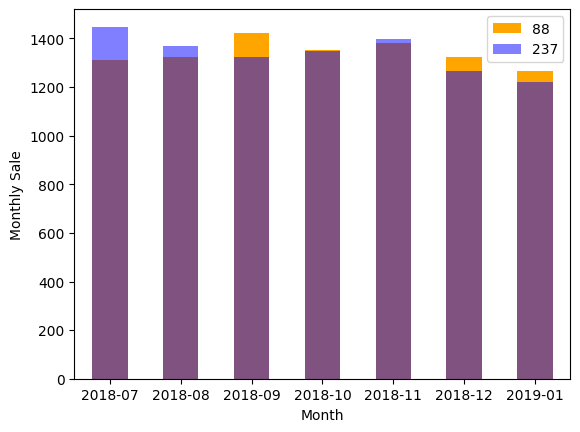

In [191]:
metrics_df.loc[88]['MONTHLY_SALE'].plot(kind = 'bar',color='orange')
metrics_df.loc[237]['MONTHLY_SALE'].plot(kind = 'bar',color='b', alpha = 0.5)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Monthly Sale')
plt.legend(labels = (88, 237))
plt.show()

Even though the monthly sale values are diffrent but we see a similar trend in the sales through out the period.

<ipython-input-192-09a88d20820c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[88]['MONTHLY_CUSTS'], color = 'r', ax = ax)
<ipython-input-192-09a88d20820c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(metrics_df.loc[237]['MONTHLY_CUSTS'], color = 'g', ax = ax)


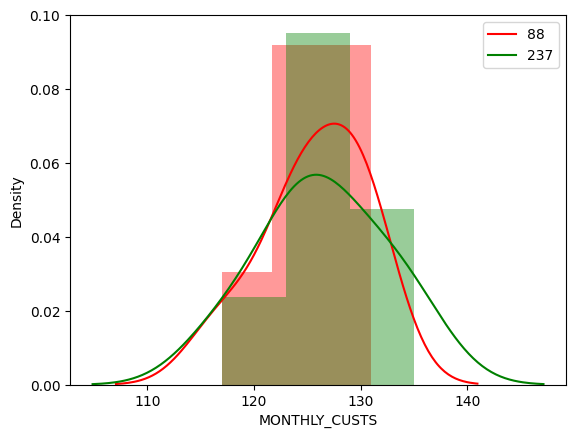

In [192]:
fig, ax = plt.subplots()
sns.distplot(metrics_df.loc[88]['MONTHLY_CUSTS'], color = 'r', ax = ax)
sns.distplot(metrics_df.loc[237]['MONTHLY_CUSTS'], color = 'g', ax = ax)
plt.legend(labels = ['88', '237'])
plt.show()

We can see that monthly customers are similar in both the stores.

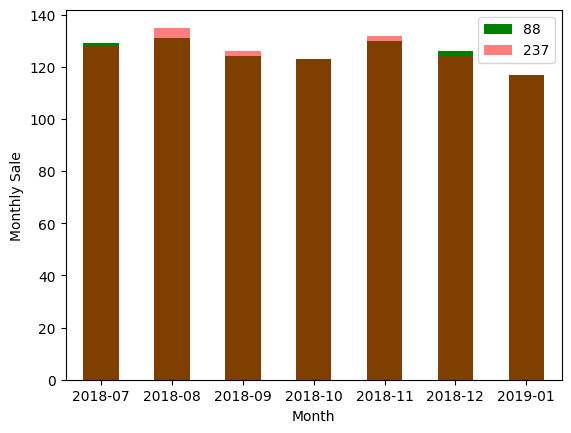

In [193]:
metrics_df.loc[88]['MONTHLY_CUSTS'].plot(kind = 'bar', color = 'g')
metrics_df.loc[237]['MONTHLY_CUSTS'].plot(kind = 'bar', color = 'r', alpha = 0.5)
plt.xticks(rotation = 0)
plt.xlabel('Month')
plt.ylabel('Monthly Sale')
plt.legend(labels = (88, 237))
plt.show()

In [194]:
cols_under_consideration = ['MONTHLY_SALE','MONTHLY_CUSTS']
a=[]
for x in metrics_df[cols_under_consideration]:
  a.append(ks_2samp(metrics_df.loc[88][x],metrics_df.loc[237][x]))
a=pd.DataFrame(a, index = cols_under_consideration)
a.head()

,statistic,pvalue
MONTHLY_SALE,0.285714,0.962704
MONTHLY_CUSTS,0.285714,0.962704


From the dataframe above we can say that both are similar (pvalues are high close to 1). Hence we cannot reject our null hypothesis.

# Assessment of Trial

Now we'll compare the trial store with the control store in the trial period i.e. from Febraury 2019 to April 2019.

In [195]:
b = []
for x in trial_metrics_df[cols_under_consideration]:
    b.append(ks_2samp(trial_metrics_df.loc[88][x], trial_metrics_df.loc[237][x]))
b = pd.DataFrame(b, index = cols_under_consideration)
b.head()

,statistic,pvalue
MONTHLY_SALE,0.666667,0.6
MONTHLY_CUSTS,0.666667,0.6


Since all of the p-values are high (say more than 0.05), we reject the null hypothesis i.e. there means are significantly different.

Comparing each T-Value with 95% percentage significance critical t-value of 6 degrees of freedom (7 months of sample - 1)

In [196]:
print('critical t-value for 95% confidence level:')
t.ppf(0.95, 6)

critical t-value for 95% confidence level:


1.9431802803927816

We can see that t-value is greater than 95 percentile for febraury to april.

The results show that the trial in store 88 is significantly different to its control store in the trial period as the trial store performance lies outside of the 5% to 95% confidence interval of the control store in two of the three trial months.

Let's plot the means for both the stores in trial period.

<ipython-input-197-3b91f0584b4c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[88]['MONTHLY_SALE'])
<ipython-input-197-3b91f0584b4c>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[237]['MONTHLY_SALE'])


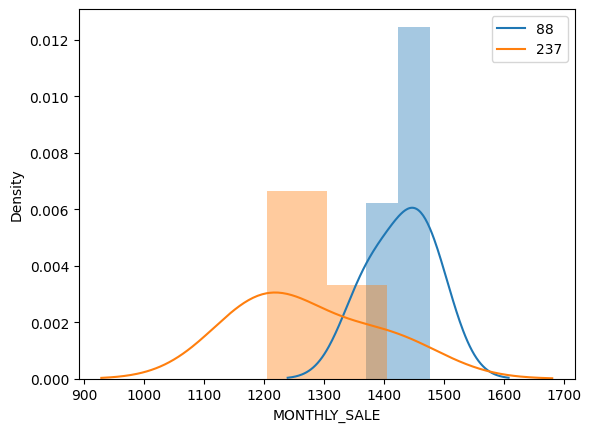

In [197]:
sns.distplot(trial_metrics_df.loc[88]['MONTHLY_SALE'])
sns.distplot(trial_metrics_df.loc[237]['MONTHLY_SALE'])
plt.legend(labels=['88','237'])

<ipython-input-198-1b28c3052ffc>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[88]['MONTHLY_CUSTS'])
<ipython-input-198-1b28c3052ffc>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(trial_metrics_df.loc[237]['MONTHLY_CUSTS'])


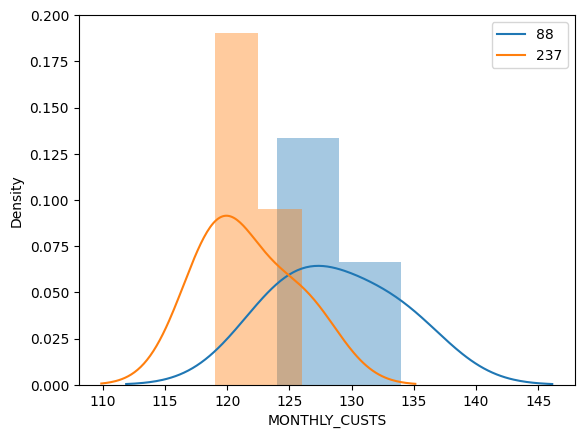

In [198]:
sns.distplot(trial_metrics_df.loc[88]['MONTHLY_CUSTS'])
sns.distplot(trial_metrics_df.loc[237]['MONTHLY_CUSTS'])
plt.legend(labels=['88','237'])

We can see that the distribution of monthly sale and monthly customers of both the stores in the trial period is much different than the distribution of monthly sale and monthly customers in pre-trial period.

The results show that the trial store 88 is significantly different to its control store in the trial period as the trial store performance lies outside the 5% to 95% confidence interval of the control store in two of the three trial months.

We can also see that there is significant increase in sales of chips in trial stores in the trial period.

# CONCLUSION

The results for trial stores 77 and 88 during the trial period show a significant difference in at least two of the three trial months but this is not the case for trial store 86. We can check with the client if the implementation of the trial was different in trial store 86 but overall, the trial shows a significant increase in sales.